# 「データ解析のための統計モデリング入門(緑本) 11章」補足用ノート
<div style="text-align: right;">
2019/10/18<br>   
AI研C 1S 大澤
</div>

In [1]:
import numpy as np
import pandas as pd

#import pystan
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

import seaborn as sns

file = 'data/c11/d.csv'
csv_df = pd.read_csv(file)
print(csv_df.head(10))

    y          m
0   0   2.154980
1   3   3.254165
2   2   4.628666
3   5   6.234124
4   6   7.990730
5  16   9.794474
6   8  11.533365
7  14  13.104252
8  11  14.426302
9  10  15.448779


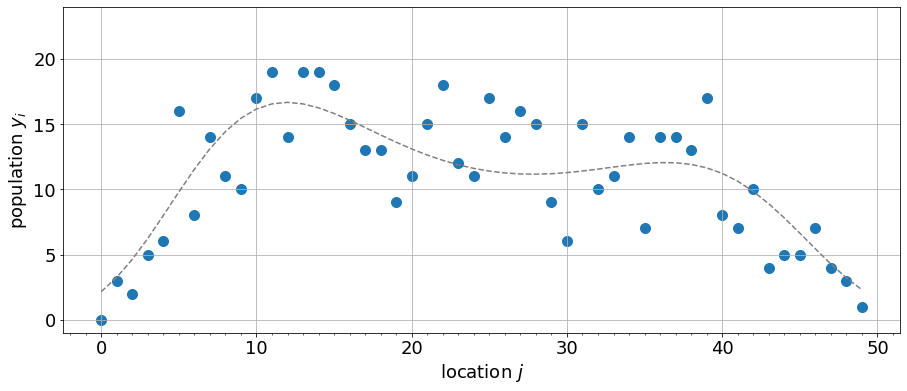

In [2]:

y_df = csv_df['y']
m_df = csv_df['m']

x_range = len(csv_df)
xx = np.arange(x_range)
plt.figure(figsize=(15,6))
plt.rcParams["font.size"] = 18
plt.scatter(xx, y_df, s=100)
plt.plot(xx, m_df, color="0.5",linestyle="dashed")
plt.xlabel('location $j$')
plt.ylabel('population $y_i$')
plt.gca().xaxis.set_minor_locator(tick.MultipleLocator(1))
plt.grid() #plt.grid(which='minor')
plt.ylim(-1, 24)
plt.show()

https://docs.pymc.io/notebooks/PyMC3_tips_and_heuristic.html

In [11]:
from theano import scan
floatX = "float32"

from pymc3.distributions import continuous
from pymc3.distributions import distribution
import scipy.stats as stats
import pymc3 as pm
from theano import shared
import theano
import theano.tensor as tt

class CAR2(distribution.Continuous):
    """
    Conditional Autoregressive (CAR) distribution

    Parameters
    ----------
    a : adjacency matrix
    w : weight matrix
    tau : precision at each location
    """

    def __init__(self, w, a, tau, *args, **kwargs):
        super(CAR2, self).__init__(*args, **kwargs)
        self.a = a = tt.as_tensor_variable(a)
        self.w = w = tt.as_tensor_variable(w)
        self.tau = tau*tt.sum(w, axis=1)
        self.mode = 0.

    def logp(self, x):
        tau = self.tau
        w = self.w
        a = self.a

        mu_w = tt.sum(x*a, axis=1)/tt.sum(w, axis=1)
        return tt.sum(continuous.Normal.dist(mu=mu_w, tau=tau).logp(x))

In [15]:
y_list = csv_df['y'].values

with pm.Model() as sc_model: # spatial correlationにした
    # hyper parameterの設定
    s = pm.Uniform('s', lower=0, upper=100)
    # 全地点共通beta
    beta = pm.Normal('beta', mu=0, sd=10)
    # tauは分散の逆数
    tau = 1/(s*s)
    r =CAR2('r', w=wmat2, a=amat2, tau=tau, shape=N)
    # 出力はPoisson分布
    y = pm.Poisson('y', mu=np.exp(beta + r[np.arange(50)]), observed=y_list)
    
    inference = pm.ADVI()
    approx = pm.fit(n=100000, method=inference,random_seed=123, start=pm.find_MAP(method='Powell'))
    trace = approx.sample(draws=5000)

D:\ProgramData\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
  0%|                                                                                         | 0/5000 [00:00<?, ?it/s]D:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:500: RuntimeWarning: Method Powell does not use gradient information (jac).
  RuntimeWarning)
logp = -29.053, ||grad|| = 50.912: : 5001it [00:01, 3241.96it/s]                                                       

Average Loss = 143.98: 100%|█████████████████████████████████████████████████| 100000/100000 [00:28<00:00, 3559.43it/s]
Finished [100%]: Average Loss = 143.97


In [7]:
# 隣接情報
adj = np.array(
       [[1], [0, 2], [1, 3], [2, 4], [3, 5], [4, 6], [5, 7], [6, 8], [7, 9],
       [8, 10], [9, 11], [10, 12], [11, 13], [12, 14], [13, 15], [14, 16],
       [15, 17], [16, 18], [17, 19], [18, 20], [19, 21], [20, 22],
       [21, 23], [22, 24], [23, 25], [24, 26], [25, 27], [26, 28],
       [27, 29], [28, 30], [29, 31], [30, 32], [31, 33], [32, 34],
       [33, 35], [34, 36], [35, 37], [36, 38], [37, 39], [38, 40],
       [39, 41], [40, 42], [41, 43], [42, 44], [43, 45], [44, 46],
       [45, 47], [46, 48], [47, 49], [49]], dtype=object)

# 重み
weights = np.array(
       [[1.0], [1, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0],
       [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0],
       [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0],
       [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0],
       [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0],
       [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0],
       [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0],
       [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0],
       [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0],
       [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0]], dtype=object)

N = len(weights)
wmat2 = np.zeros((N,N))
amat2 = np.zeros((N,N))
for i, a in enumerate(adj):
    amat2[i,a] = 1
    wmat2[i,a] = weights[i]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025DC852A1D0>,
      dtype=object)

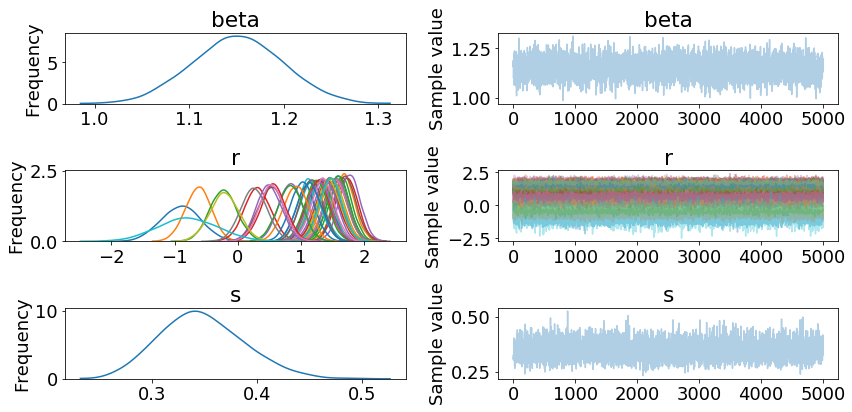

In [16]:
pm.traceplot(trace)

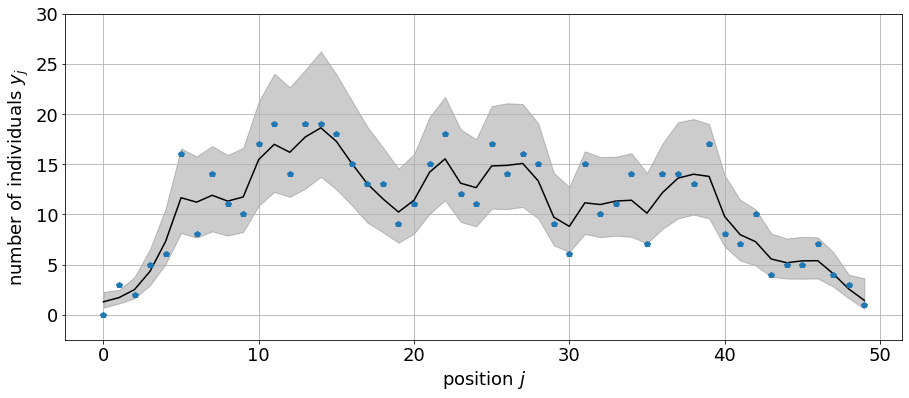

In [23]:
plt.figure(figsize=(15,6))
b = np.median(trace.get_values('beta'))
r = np.median(trace.get_values('r'),axis=0)
xx = np.arange(N)
yy = np.exp(b+r)
plt.plot(xx,yy, 'k-')
hpd = pm.hpd(trace.get_values('r'), alpha=0.05)
plt.fill_between(xx, np.exp(b+hpd.T[0]), np.exp(b+hpd.T[1]), color='k', alpha=0.2)
plt.plot(range(len(y_list)),y_list, 'p')
plt.xlabel('position $j$')
plt.ylabel('number of individuals $y_j$')
plt.ylim(-2.5,30)
plt.grid()
#plt.show()